In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import cv2


In [3]:
data_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri"

# Check if path exists
if os.path.exists(data_dir):
    print("✅ Path exists:", data_dir)
    # List subdirectories (e.g., train, test, val)
    print("Subdirectories:", os.listdir(data_dir))
else:
    print("❌ Path not found!")

✅ Path exists: C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri
Subdirectories: ['test', 'train', 'val']


In [4]:
import os

data_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri"

splits = ["train", "validation", "test"]

for split in splits:
    split_path = os.path.join(data_dir, split)
    if not os.path.exists(split_path):
        print(f"\n⚠️ {split.upper()} folder not found!")
        continue

    print(f"\n📂 {split.upper()} set:")

    for patient in os.listdir(split_path):
        patient_path = os.path.join(split_path, patient)
        if not os.path.isdir(patient_path):
            continue

        originals = [
            f for f in os.listdir(patient_path)
            if f.lower().endswith(('.tif', '.tiff')) and not f.lower().endswith('_mask.tif')
        ]
        masks = [
            f for f in os.listdir(patient_path)
            if f.lower().endswith(('_mask.tif', '_mask.tiff'))
        ]

        print(f"  🧑 Patient {patient}: {len(originals)} originals | {len(masks)} masks")



📂 TRAIN set:
  🧑 Patient TCGA_CS_4941_19960909: 23 originals | 23 masks
  🧑 Patient TCGA_CS_4944_20010208: 20 originals | 20 masks
  🧑 Patient TCGA_CS_5393_19990606: 20 originals | 20 masks
  🧑 Patient TCGA_CS_5395_19981004: 20 originals | 20 masks
  🧑 Patient TCGA_CS_5396_20010302: 24 originals | 24 masks
  🧑 Patient TCGA_CS_5397_20010315: 22 originals | 22 masks
  🧑 Patient TCGA_CS_6186_20000601: 25 originals | 25 masks
  🧑 Patient TCGA_CS_6188_20010812: 24 originals | 24 masks
  🧑 Patient TCGA_CS_6290_20000917: 20 originals | 20 masks
  🧑 Patient TCGA_CS_6665_20010817: 24 originals | 24 masks
  🧑 Patient TCGA_CS_6666_20011109: 26 originals | 26 masks
  🧑 Patient TCGA_CS_6667_20011105: 20 originals | 20 masks
  🧑 Patient TCGA_CS_6669_20020102: 22 originals | 22 masks
  🧑 Patient TCGA_DU_5849_19950405: 38 originals | 38 masks
  🧑 Patient TCGA_DU_5851_19950428: 40 originals | 40 masks
  🧑 Patient TCGA_DU_5852_19950709: 36 originals | 36 masks
  🧑 Patient TCGA_DU_5853_19950823: 36 orig

In [6]:
import os

data_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri"

splits = ["train", "val", "test"]

counts = {}


for split in splits:
    split_path = os.path.join(data_dir, split)
    if not os.path.exists(split_path):
        print(f"⚠️ {split.upper()} folder not found!")
        continue

    counts[split] = {}

    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if not os.path.isdir(cls_path):
            continue

        num_images = len([
            f for f in os.listdir(cls_path)
            if f.lower().endswith(('.tif', '.tiff')) and not f.lower().endswith('_mask.tif')
        ])

        counts[split][cls] = num_images

split_totals = {split: sum(class_counts.values()) for split, class_counts in counts.items()}
grand_total = sum(split_totals.values())

for split, total in split_totals.items():
    print(f"{split.capitalize()} total: {total} images")

print(f"\n📊 Grand Total: {grand_total} images")


Train total: 2760 images
Val total: 646 images
Test total: 523 images

📊 Grand Total: 3929 images


In [8]:
import os

data_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri"
splits = ["train", "val", "test"]

counts_all = {}

for split in splits:
    split_path = os.path.join(data_dir, split)
    if not os.path.exists(split_path):
        print(f"⚠️ {split.upper()} folder not found!")
        continue

    counts_all[split] = {}

    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if not os.path.isdir(cls_path):
            continue

        # Count ALL .tif/.tiff files (originals + masks)
        num_images = len([
            f for f in os.listdir(cls_path)
            if f.lower().endswith(('.tif', '.tiff'))
        ])

        counts_all[split][cls] = num_images

split_totals_all = {split: sum(class_counts.values()) for split, class_counts in counts_all.items()}
grand_total_all = sum(split_totals_all.values())

for split, total in split_totals_all.items():
    print(f"{split.capitalize()} total: {total} images (including masks)")

print(f"\n📊 Grand Total (including masks): {grand_total_all} images")

Train total: 5520 images (including masks)
Val total: 1292 images (including masks)
Test total: 1046 images (including masks)

📊 Grand Total (including masks): 7858 images


In [9]:
import os
import shutil

data_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri"
splits = ["train", "val", "test"]

for split in splits:
    split_path = os.path.join(data_dir, split)
    if not os.path.exists(split_path):
        print(f"⚠️ {split} not found, skipping...")
        continue


    orig_root = os.path.join(split_path, "Original")
    segm_root = os.path.join(split_path, "Segmented")
    os.makedirs(orig_root, exist_ok=True)
    os.makedirs(segm_root, exist_ok=True)

    for patient in os.listdir(split_path):
        patient_path = os.path.join(split_path, patient)
        if not os.path.isdir(patient_path) or patient in ["Original", "Segmented"]:
            continue

        orig_patient = os.path.join(orig_root, patient)
        segm_patient = os.path.join(segm_root, patient)
        os.makedirs(orig_patient, exist_ok=True)
        os.makedirs(segm_patient, exist_ok=True)

        for f in os.listdir(patient_path):
            src = os.path.join(patient_path, f)

            if f.lower().endswith(('_mask.tif', '_mask.tiff')):
                shutil.copy(src, os.path.join(segm_patient, f))
            elif f.lower().endswith(('.tif', '.tiff')):
                shutil.copy(src, os.path.join(orig_patient, f))

    print(f"✅ Split done for {split}")


✅ Split done for train
✅ Split done for val
✅ Split done for test


In [10]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import mplcyberpunk

Split chosen: test


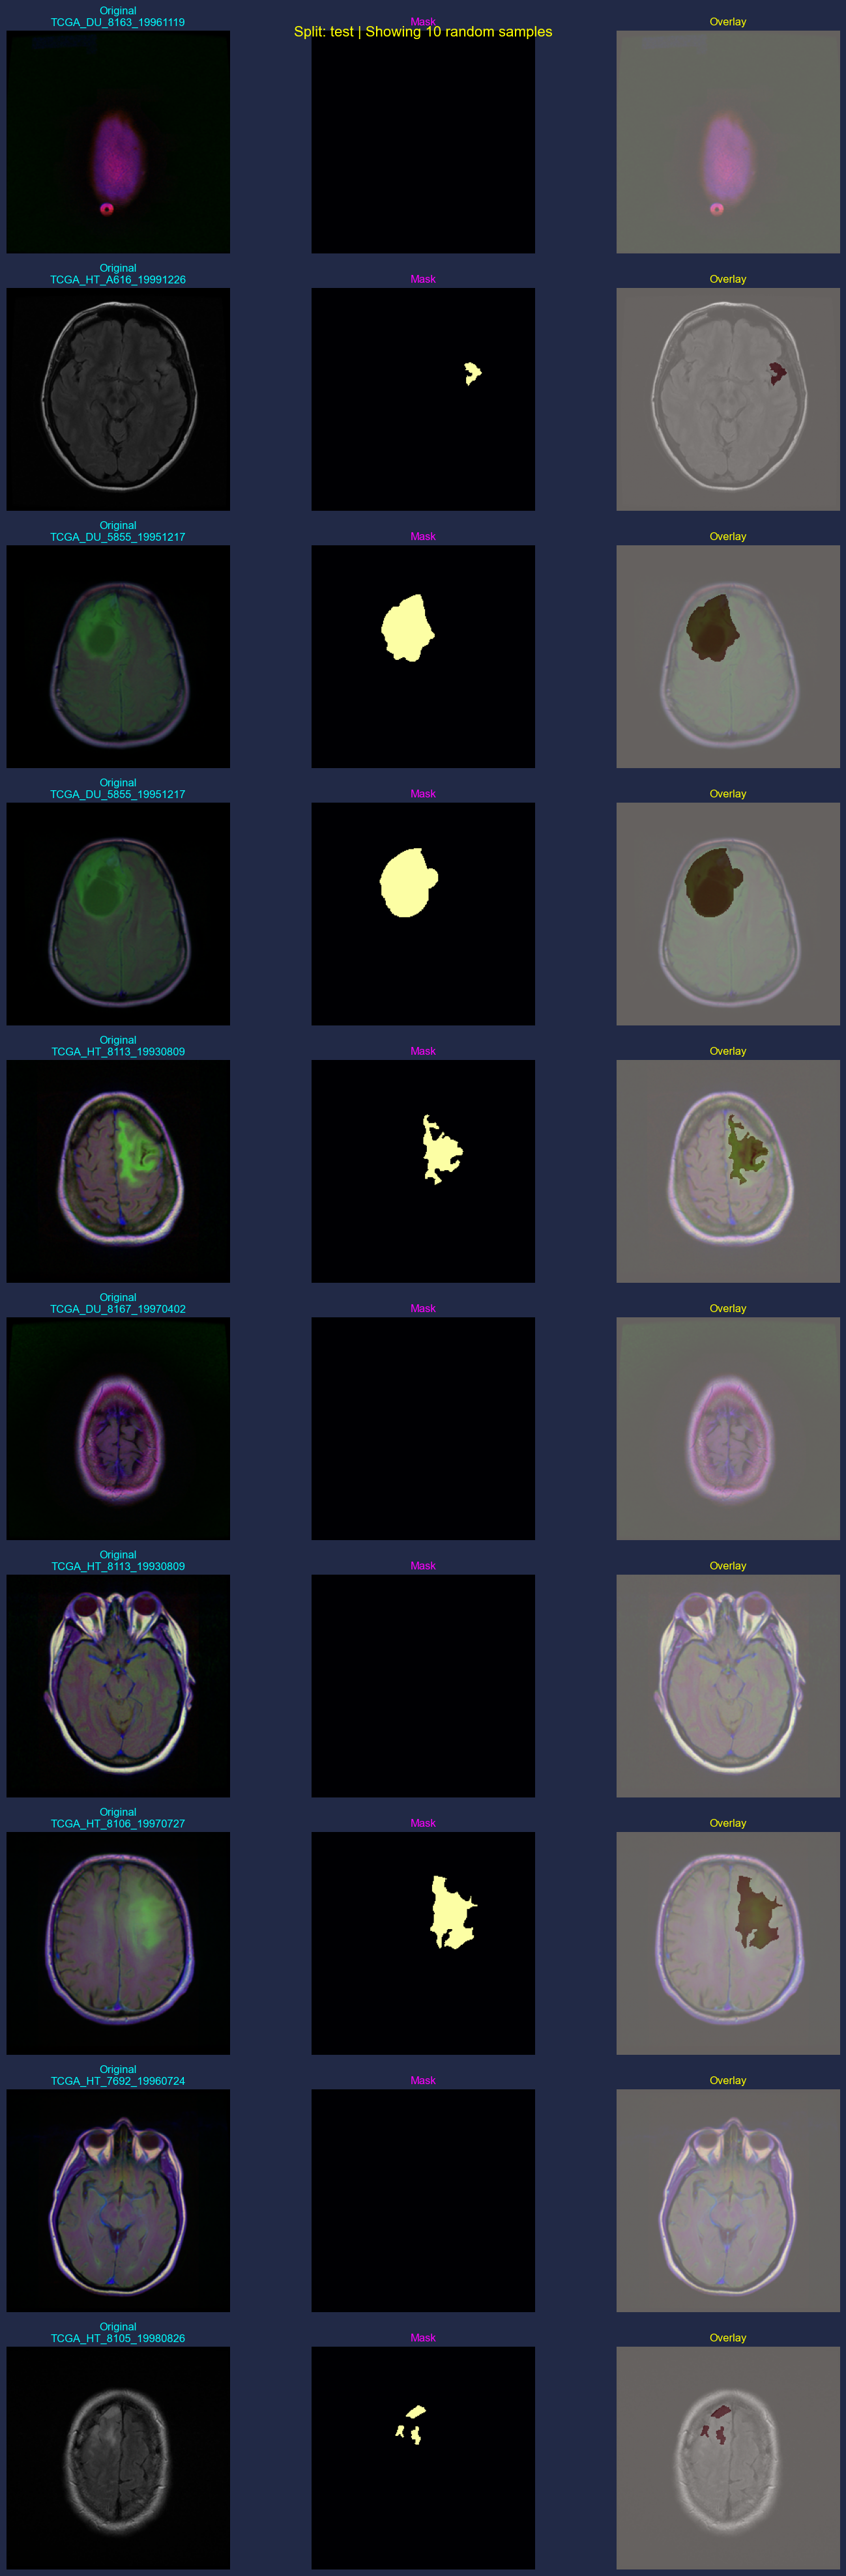

In [24]:
data_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri"
splits = ["train", "val", "test"]

random_split = random.choice(splits)
print("Split chosen:", random_split)

orig_root = os.path.join(data_dir, random_split, "Original")
segm_root = os.path.join(data_dir, random_split, "Segmented")

num_samples = 10

samples = []
for _ in range(num_samples):
    random_class = random.choice(os.listdir(orig_root))
    img_name = random.choice(os.listdir(os.path.join(orig_root, random_class)))
    samples.append((random_class, img_name))

plt.style.use("cyberpunk")
fig, axes = plt.subplots(num_samples, 3, figsize=(15, 4 * num_samples))

for i, (random_class, img_name) in enumerate(samples):
    orig_path = os.path.join(orig_root, random_class, img_name)
    name, ext = os.path.splitext(img_name)
    mask_name = name + "_mask" + ext
    segm_path = os.path.join(segm_root, random_class, mask_name)

    orig_img = cv2.imread(orig_path, cv2.IMREAD_UNCHANGED)
    segm_img = cv2.imread(segm_path, cv2.IMREAD_UNCHANGED)

    if orig_img is None or segm_img is None:
        continue
    if orig_img.ndim == 3:
        base = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
        gray_base = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
    else:
        base = orig_img
        gray_base = orig_img

    if segm_img.ndim == 3:
        mask = cv2.cvtColor(segm_img, cv2.COLOR_BGR2GRAY)
    else:
        mask = segm_img

    # --- Original ---
    axes[i, 0].imshow(base)  
    axes[i, 0].set_title(f"Original\n{random_class}", fontsize=12, color="cyan")
    axes[i, 0].axis("off")

    # --- Mask ---
    axes[i, 1].imshow(mask, cmap="inferno")  
    axes[i, 1].set_title("Mask", fontsize=12, color="magenta")
    axes[i, 1].axis("off")

    # --- Overlay ---
    axes[i, 2].imshow(base)  # RGB background
    axes[i, 2].imshow(mask, cmap="Reds", alpha=0.4)  
    axes[i, 2].set_title("Overlay", fontsize=12, color="yellow")
    axes[i, 2].axis("off")

plt.suptitle(f"Split: {random_split} | Showing {num_samples} random samples",
             fontsize=16, color="yellow")
plt.tight_layout()
plt.show()


In [25]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence

print("TF version:", tf.__version__)



TF version: 2.15.0


In [26]:
def iou_metric(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.int32)
    y_true = tf.cast(y_true > 0.5, tf.int32)
    intersection = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    union = tf.reduce_sum(tf.cast(y_true + y_pred, tf.float32)) - intersection
    return (intersection + 1e-7) / (union + 1e-7)

def dice_coefficient(y_true, y_pred, smooth=1e-7):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    y_true = tf.cast(y_true > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)


In [27]:
def unet_model(input_size=(128, 128, 3), num_classes=1):
    inputs = Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

In [28]:
IMG_SIZE = (128, 128)

class SegmentationDataGenerator(Sequence):
    def __init__(self, image_root, mask_root, batch_size=16):
        self.image_paths = []
        self.mask_paths = []
        self.batch_size = batch_size

        for subfolder in os.listdir(image_root):
            img_dir = os.path.join(image_root, subfolder)
            mask_dir = os.path.join(mask_root, subfolder)

            for fname in os.listdir(img_dir):
                img_path = os.path.join(img_dir, fname)
                name, ext = os.path.splitext(fname)
                mask_path = os.path.join(mask_dir, name + "_mask" + ext)

                if os.path.exists(mask_path):
                    self.image_paths.append(img_path)
                    self.mask_paths.append(mask_path)

        self.indices = np.arange(len(self.image_paths))

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        X, y = [], []

        for i in batch_idx:
            img = cv2.imread(self.image_paths[i])
            img = cv2.resize(img, IMG_SIZE)
            img = img / 255.0

            mask = cv2.imread(self.mask_paths[i], cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, IMG_SIZE)
            mask = mask / 255.0
            mask = np.expand_dims(mask, axis=-1)

            X.append(img)
            y.append(mask)

        return np.array(X), np.array(y)


In [29]:
data_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\data\processed\segmentation\brain_mri"

train_gen = SegmentationDataGenerator(
    image_root=os.path.join(data_dir, "train", "Original"),
    mask_root=os.path.join(data_dir, "train", "Segmented"),
    batch_size=16
)

val_gen = SegmentationDataGenerator(
    image_root=os.path.join(data_dir, "val", "Original"),
    mask_root=os.path.join(data_dir, "val", "Segmented"),
    batch_size=16
)


In [32]:
model = unet_model(input_size=(128, 128, 3), num_classes=1)

def dice_loss(y_true, y_pred, smooth=1e-7):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return 1 - (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=lambda y_true, y_pred: 0.5*tf.keras.losses.binary_crossentropy(y_true, y_pred) + 0.5*dice_loss(y_true, y_pred),
    metrics=["accuracy", iou_metric, dice_coefficient]
)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 64)         36928     ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 64)           0         ['conv2d_20[0][0]']           
 g2D)                                                                                       

In [33]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

Epoch 1/20
173/173 [==============================] - 800s 5s/step - loss: 0.5571 - accuracy: 0.9826 - iou_metric: 0.1852 - dice_coefficient: 0.1854 - val_loss: 0.4715 - val_accuracy: 0.9923 - val_iou_metric: 0.2927 - val_dice_coefficient: 0.2927
Epoch 2/20
173/173 [==============================] - 803s 5s/step - loss: 0.4148 - accuracy: 0.9829 - iou_metric: 0.3246 - dice_coefficient: 0.3845 - val_loss: 0.4368 - val_accuracy: 0.9940 - val_iou_metric: 0.3661 - val_dice_coefficient: 0.4077
Epoch 3/20
173/173 [==============================] - 807s 5s/step - loss: 0.3667 - accuracy: 0.9862 - iou_metric: 0.3862 - dice_coefficient: 0.4623 - val_loss: 0.3892 - val_accuracy: 0.9893 - val_iou_metric: 0.4263 - val_dice_coefficient: 0.4905
Epoch 4/20
173/173 [==============================] - 807s 5s/step - loss: 0.3569 - accuracy: 0.9878 - iou_metric: 0.4133 - dice_coefficient: 0.4910 - val_loss: 0.3951 - val_accuracy: 0.9869 - val_iou_metric: 0.3694 - val_dice_coefficient: 0.4339
Epoch 5/20
1

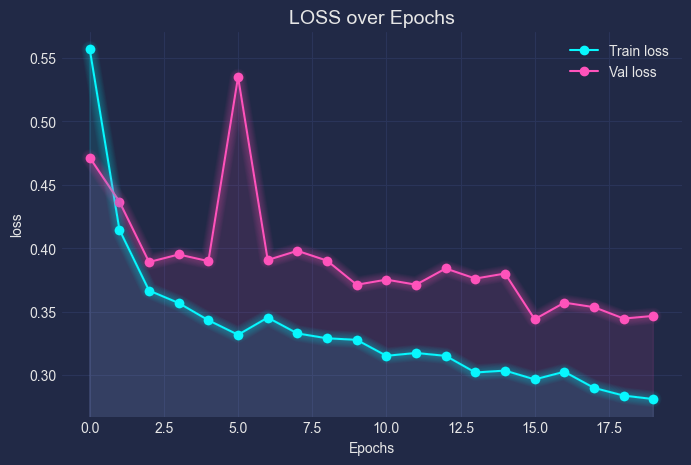

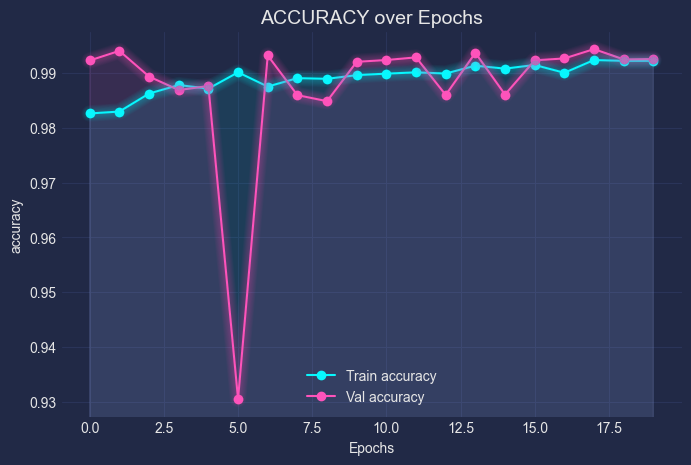

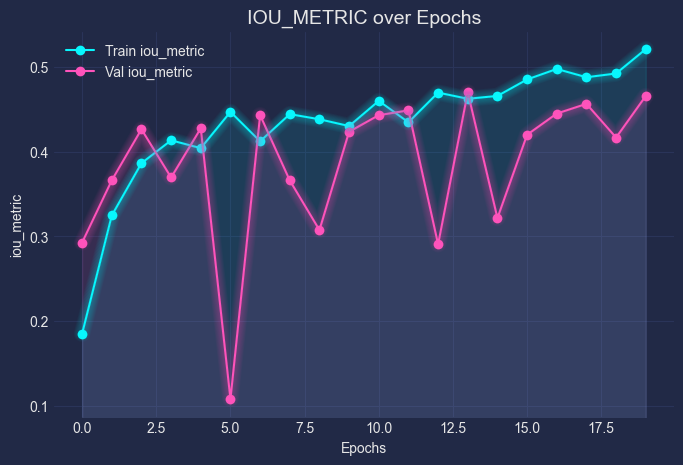

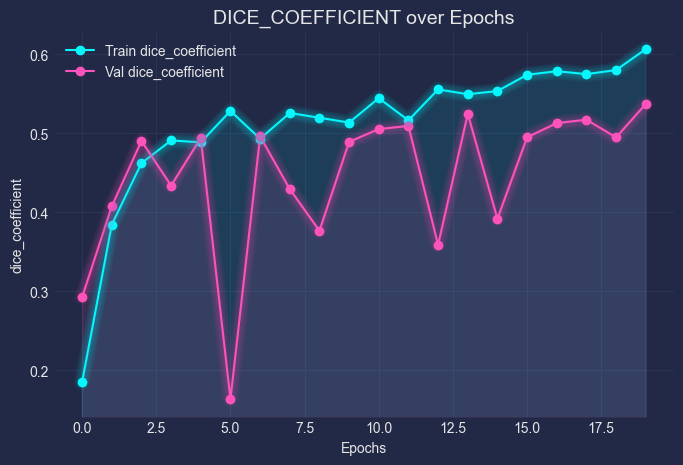

In [34]:
import matplotlib.pyplot as plt
import mplcyberpunk

def plot_training(history):
    plt.style.use("cyberpunk")
    metrics = ["loss", "accuracy", "iou_metric", "dice_coefficient"]

    for metric in metrics:
        plt.figure(figsize=(8,5))
        plt.plot(history.history[metric], label=f"Train {metric}", marker="o")
        plt.plot(history.history[f"val_{metric}"], label=f"Val {metric}", marker="o")
        plt.title(f"{metric.upper()} over Epochs", fontsize=14)
        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.legend()
        mplcyberpunk.add_glow_effects()
        plt.show()

plot_training(history)


In [35]:
test_gen = SegmentationDataGenerator(
    image_root=os.path.join(data_dir, "test", "Original"),
    mask_root=os.path.join(data_dir, "test", "Segmented"),
    batch_size=16
)

results = model.evaluate(test_gen)
print("📊 Test Results:", dict(zip(model.metrics_names, results)))


33/33 [==============================] - 32s 961ms/step - loss: 0.3080 - accuracy: 0.9895 - iou_metric: 0.4690 - dice_coefficient: 0.5565
📊 Test Results: {'loss': 0.30798646807670593, 'accuracy': 0.9895152449607849, 'iou_metric': 0.4689660370349884, 'dice_coefficient': 0.5565481185913086}


1/1 [==============================] - 2s 2s/step


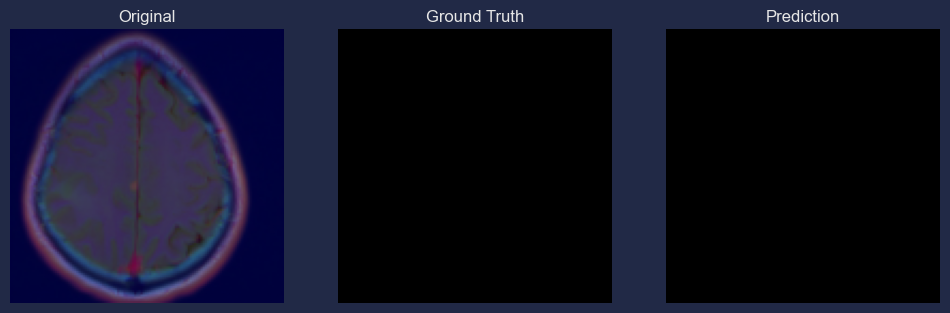

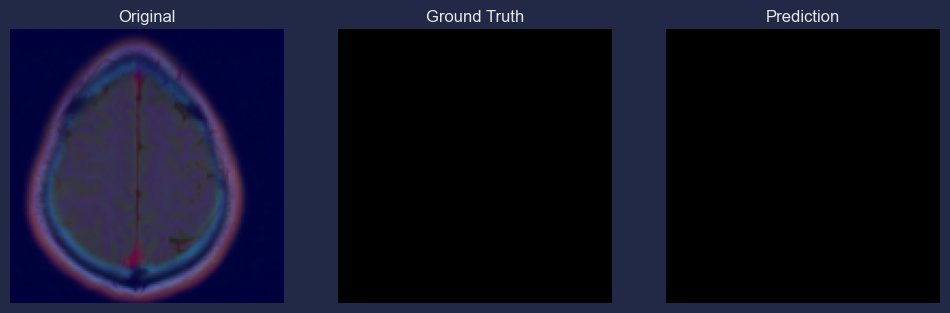

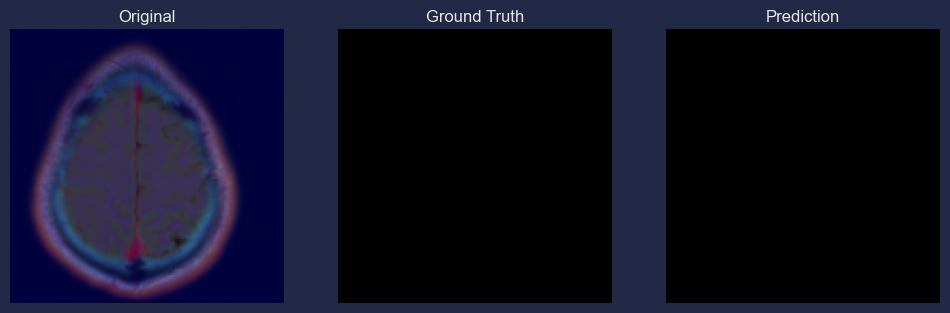

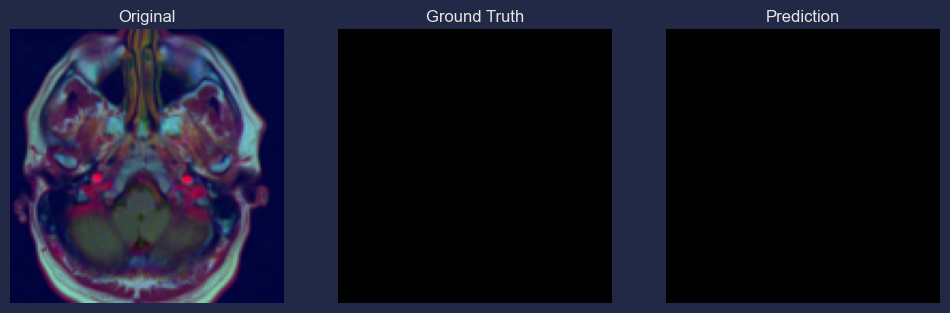

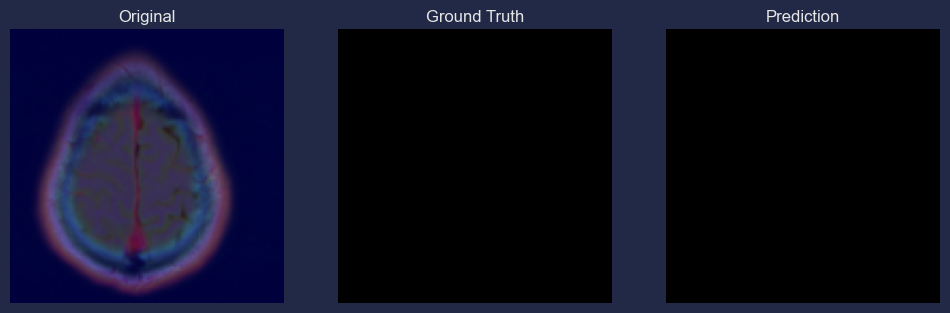

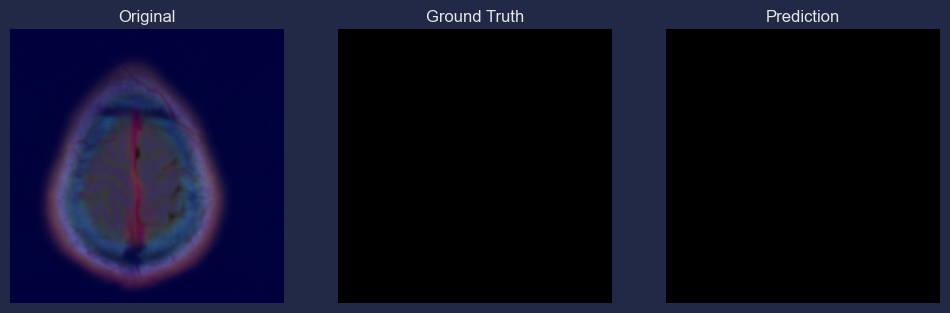

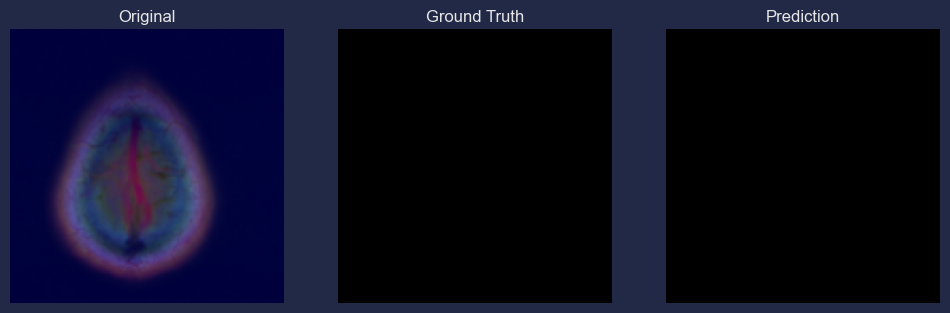

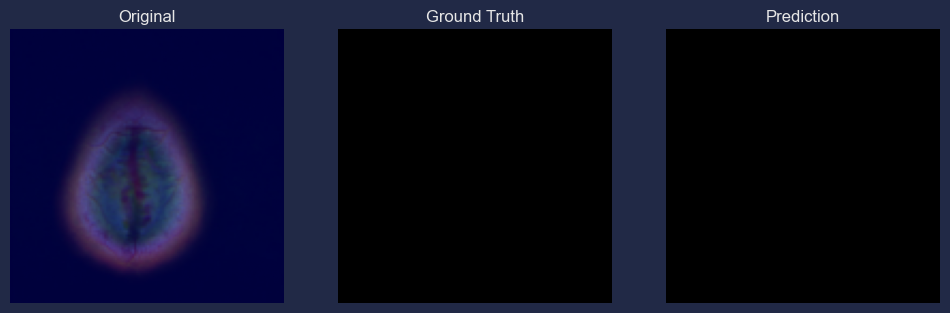

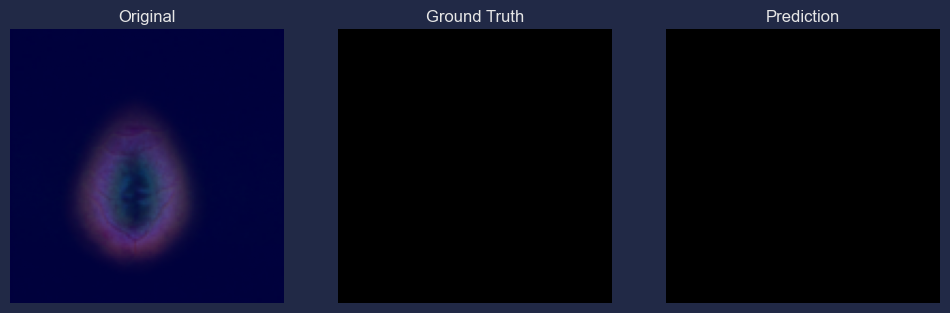

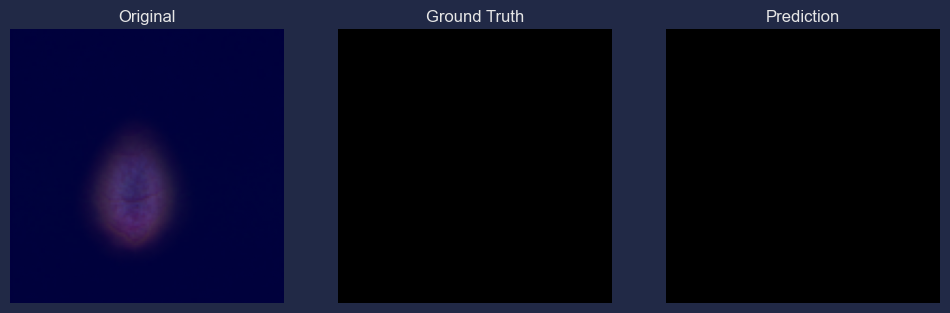

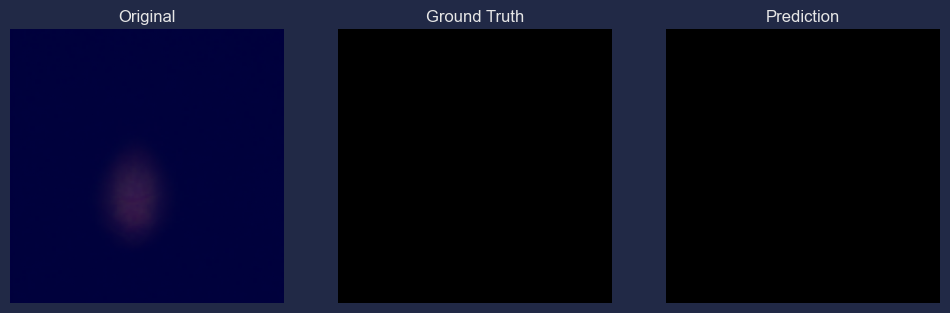

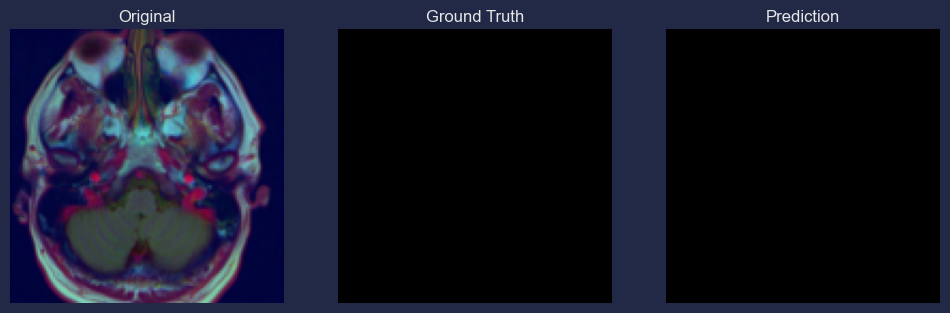

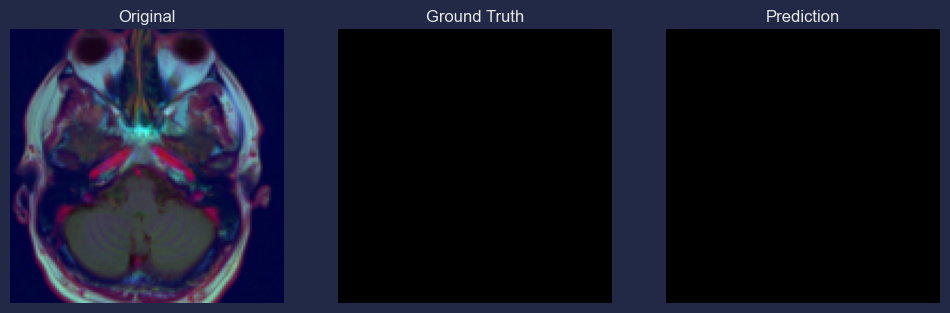

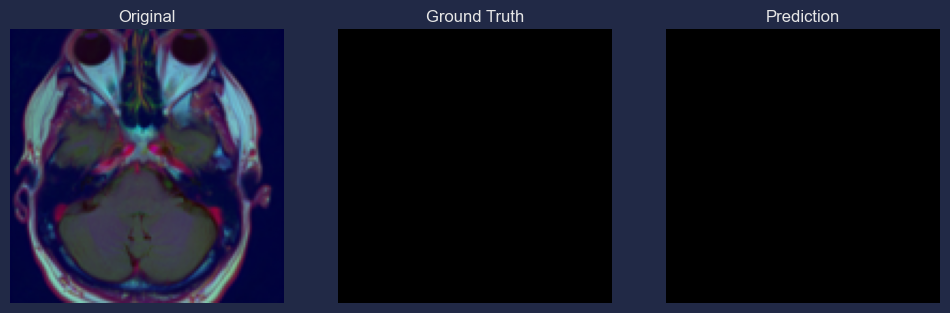

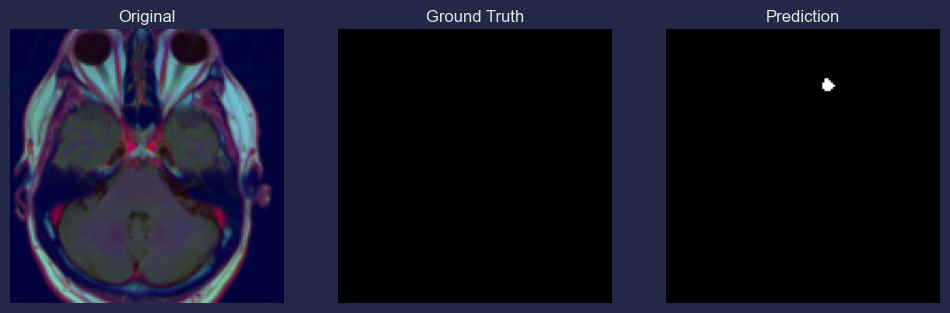

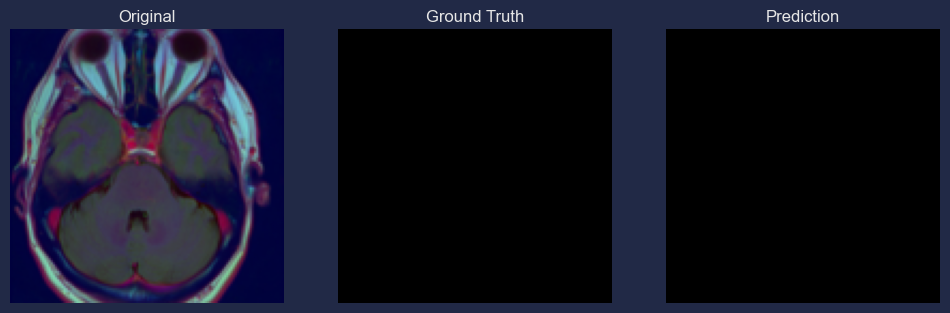

1/1 [==============================] - 1s 1s/step


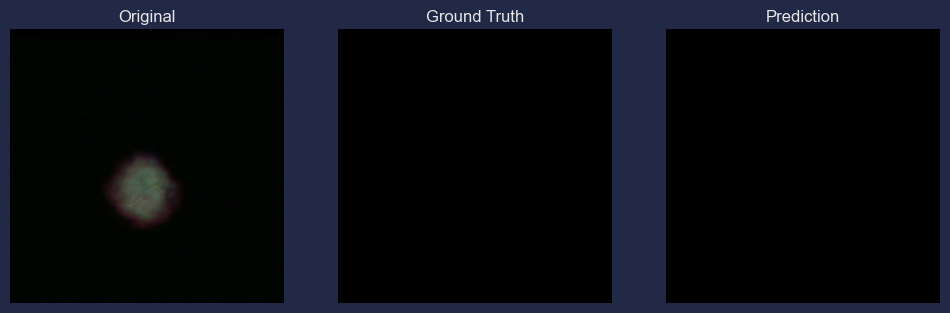

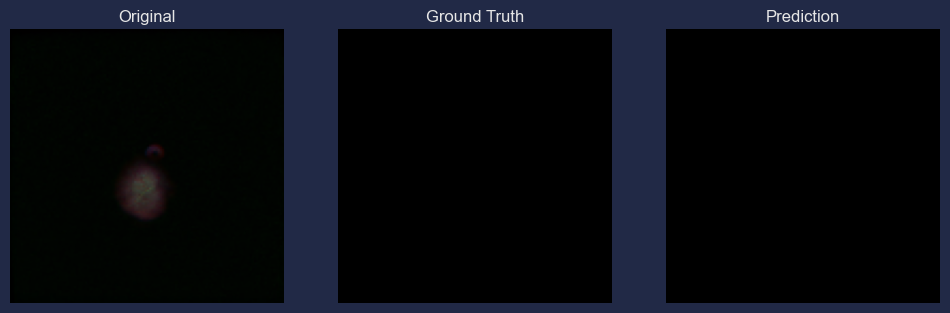

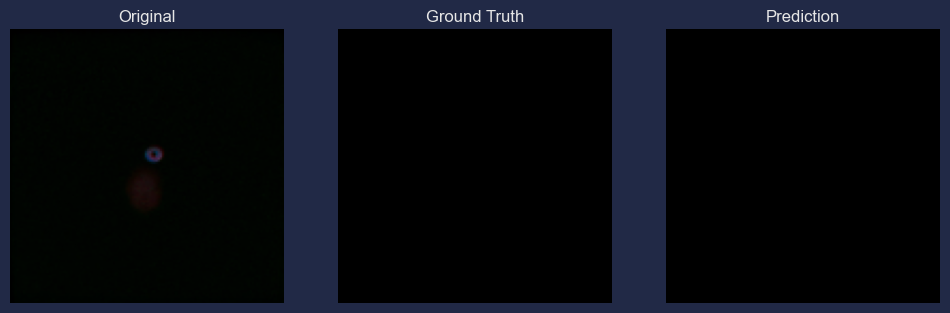

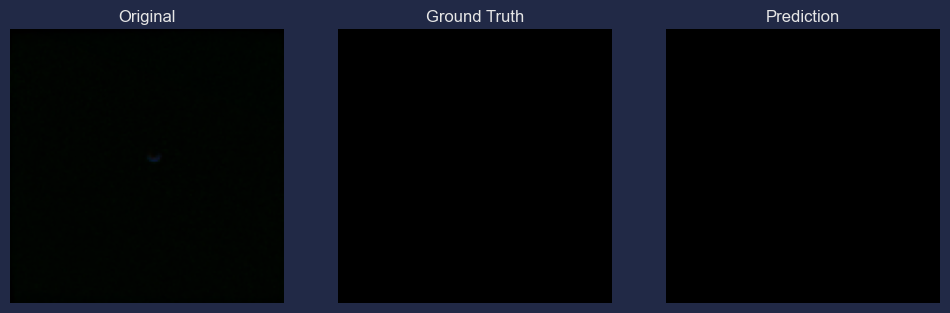

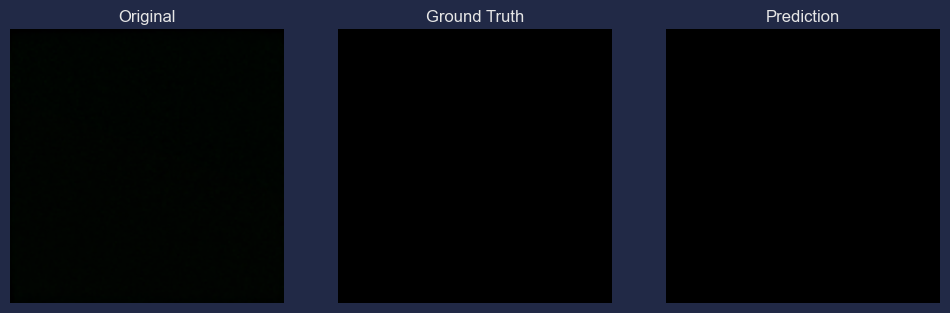

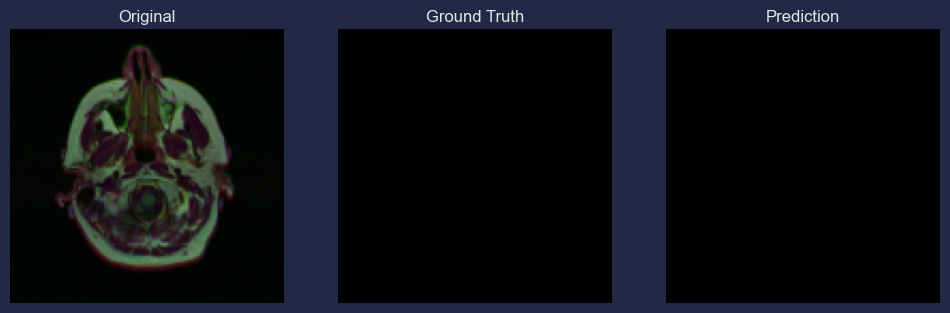

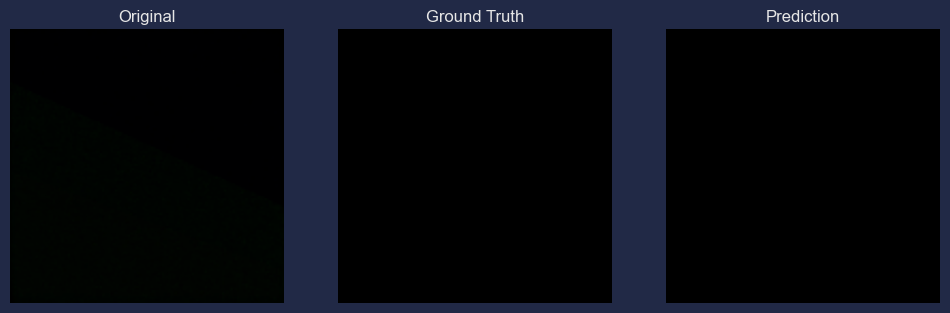

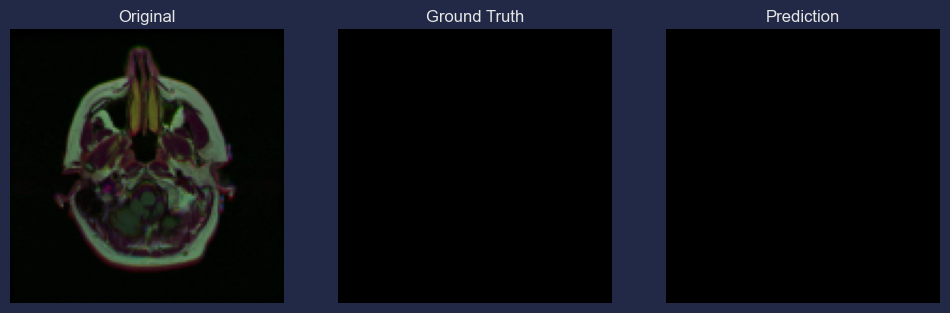

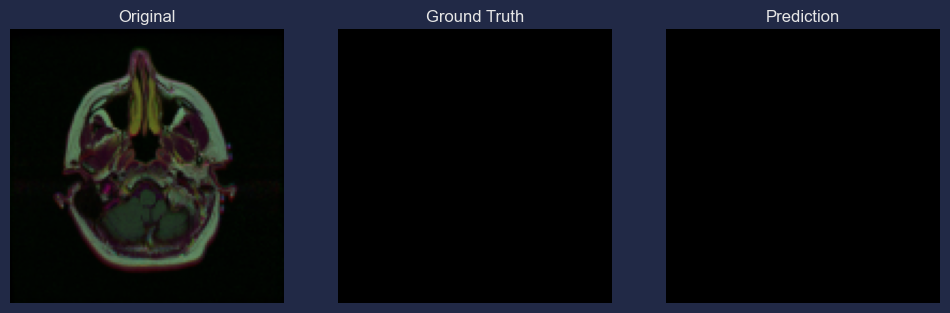

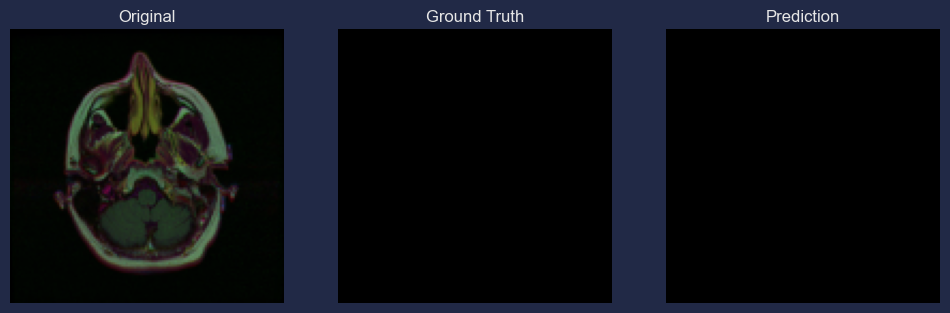

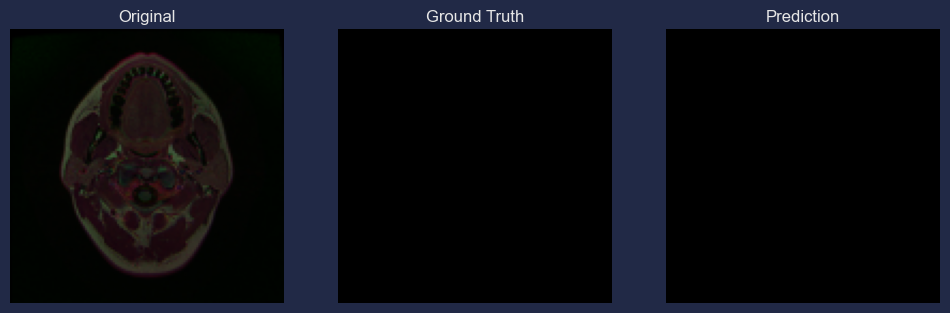

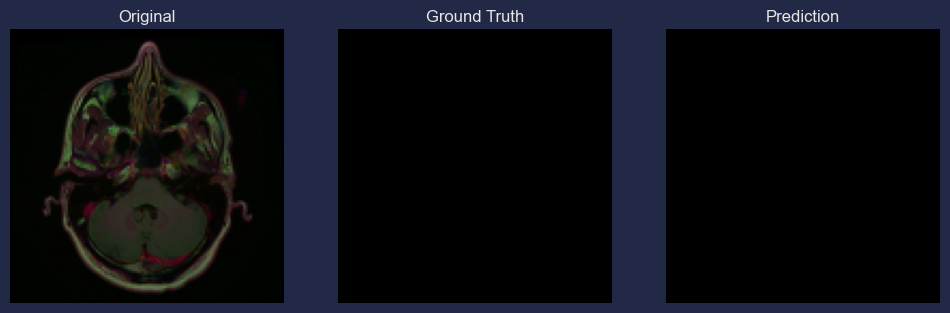

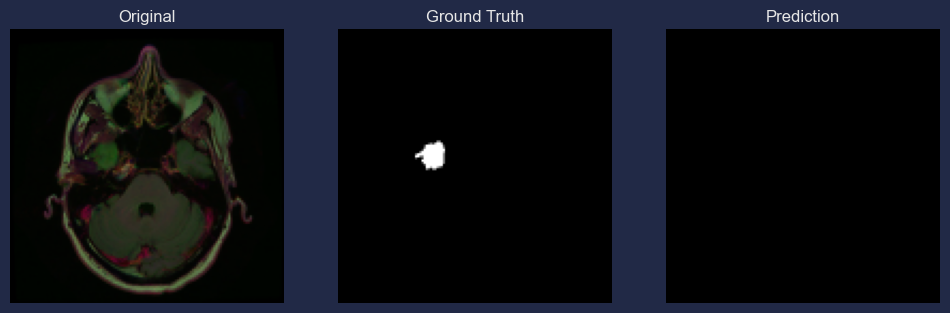

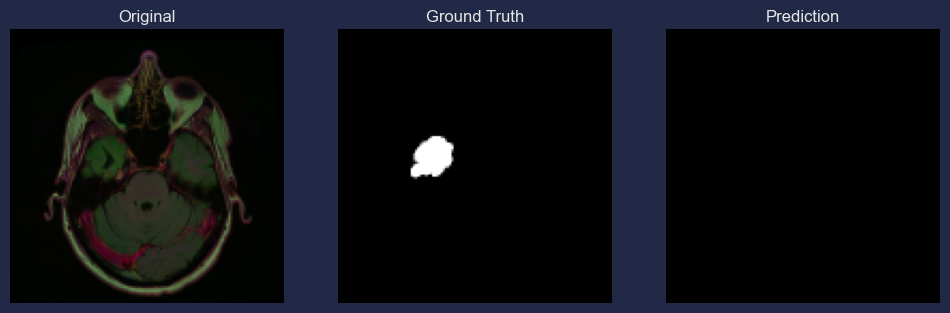

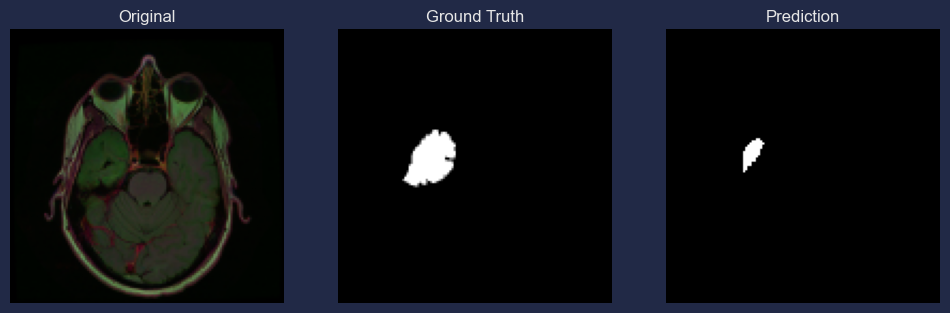

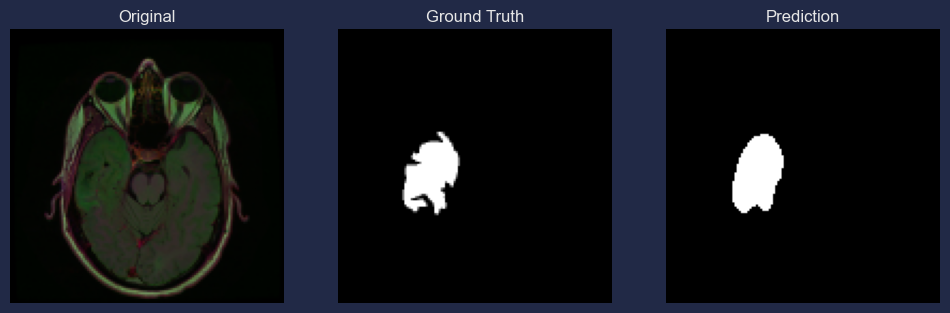

1/1 [==============================] - 1s 1s/step


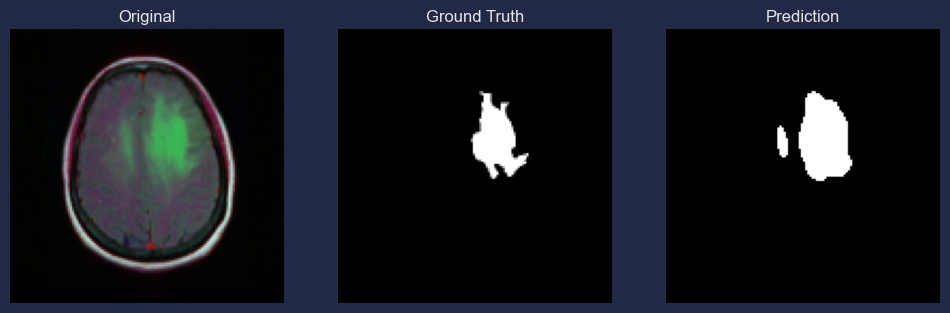

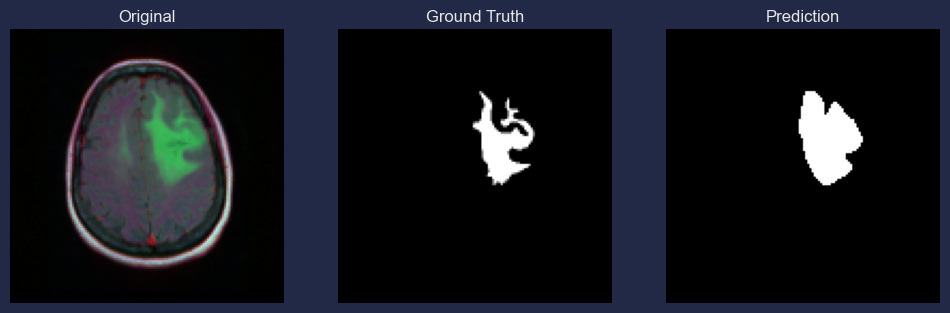

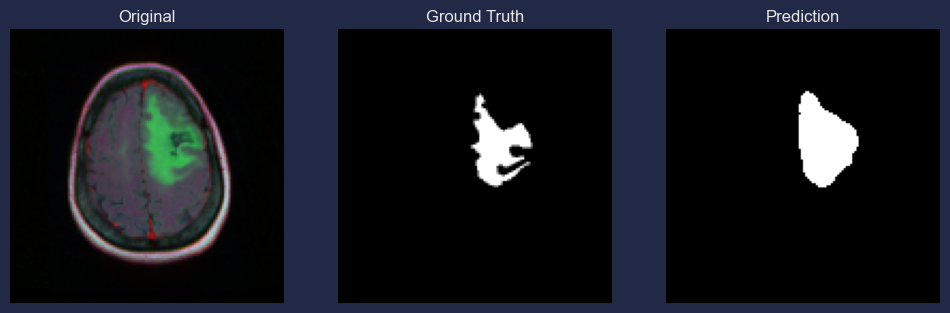

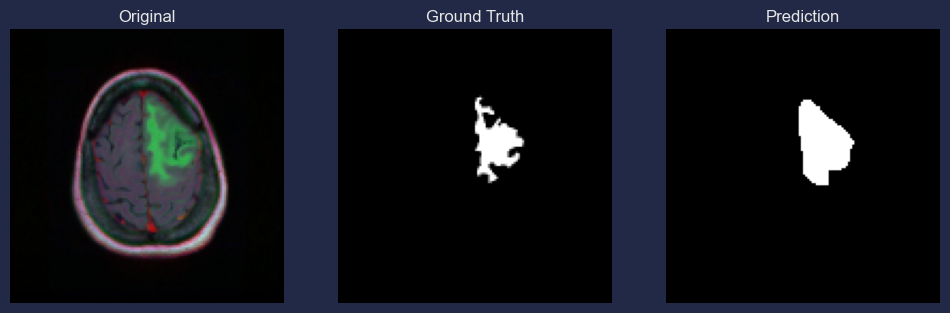

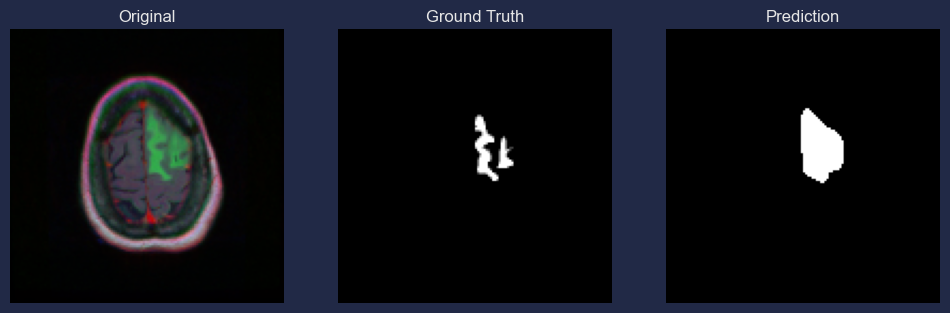

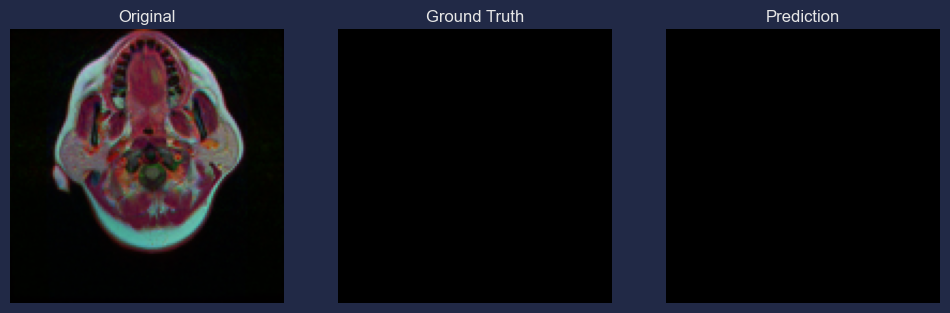

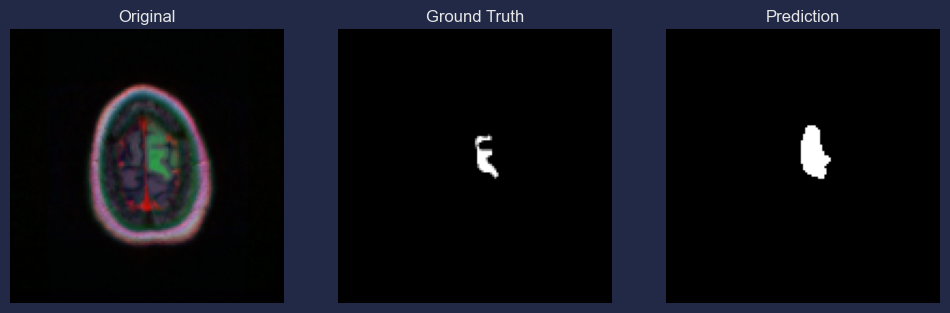

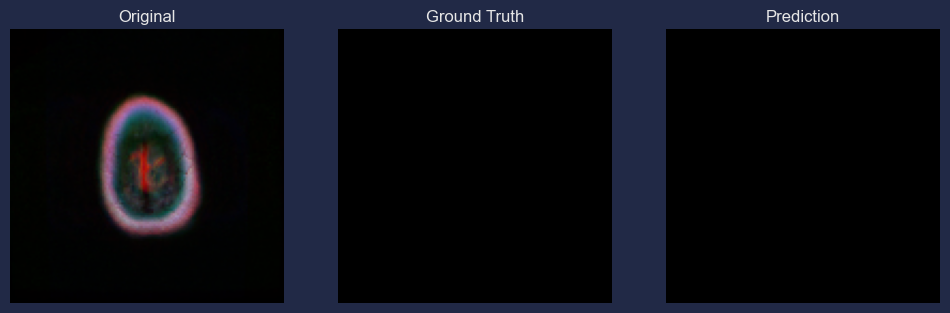

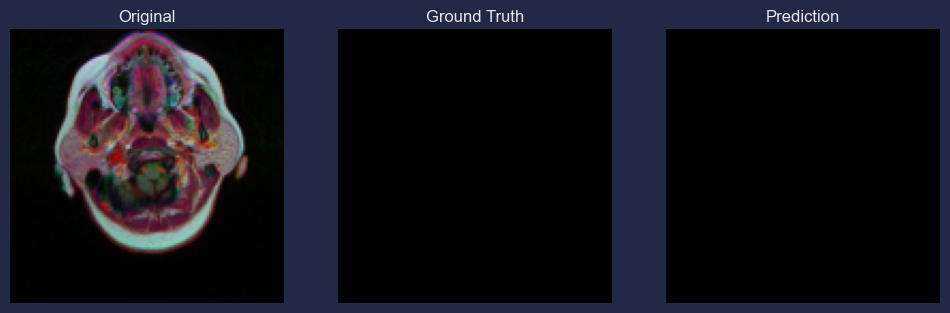

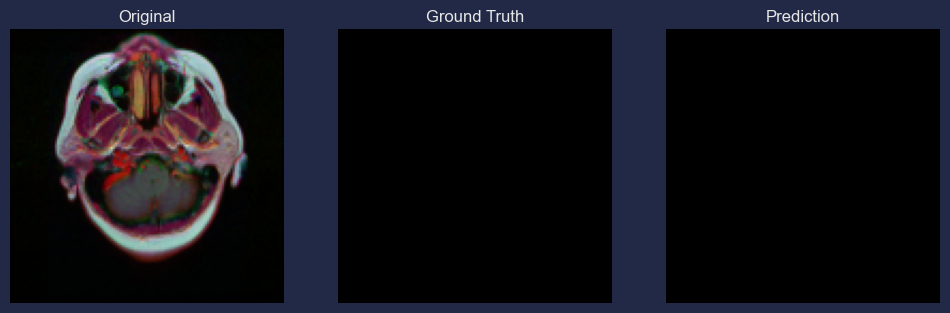

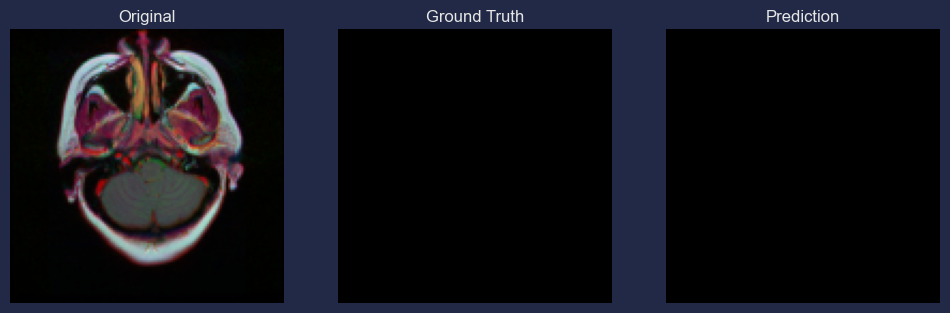

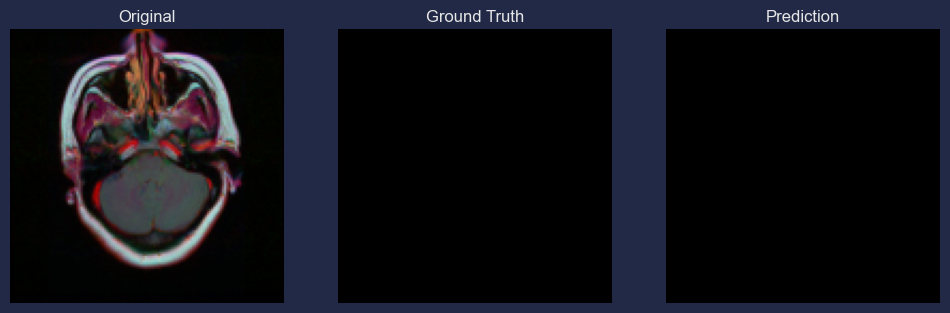

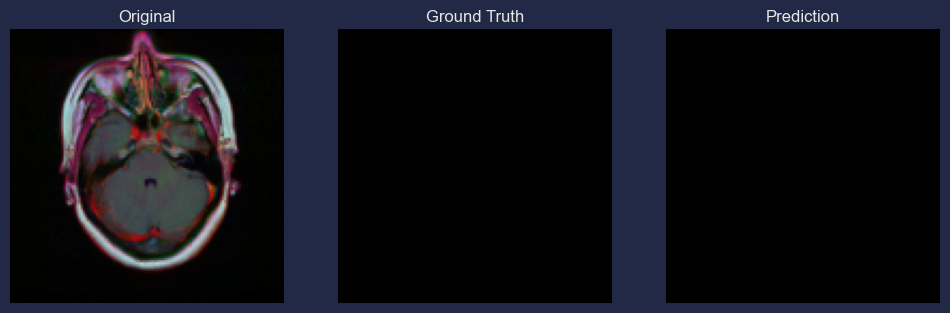

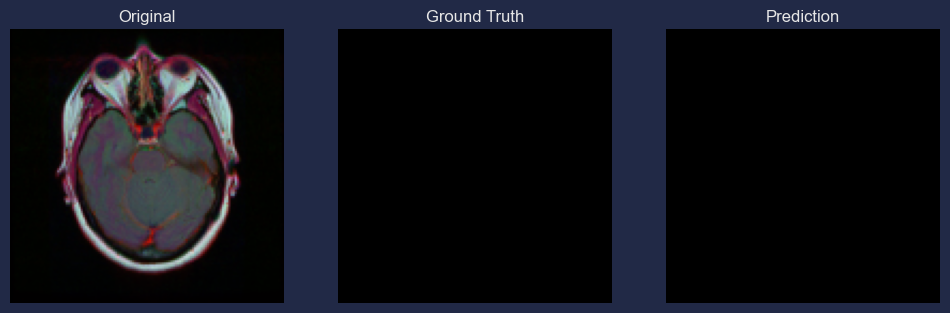

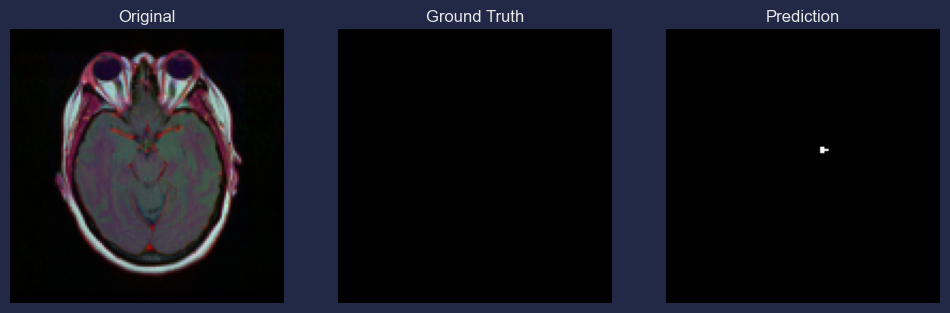

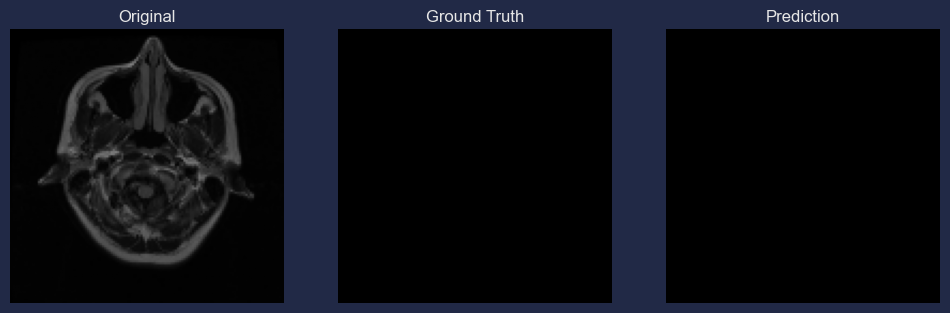

In [36]:
import random

def visualize_predictions(model, generator, num_samples=3):
    idxs = random.sample(range(len(generator)), num_samples)

    for idx in idxs:
        X, y_true = generator[idx]
        y_pred = model.predict(X)

        for i in range(len(X)):
            plt.figure(figsize=(12,4))

            # Original
            plt.subplot(1,3,1)
            plt.imshow(X[i])
            plt.title("Original")
            plt.axis("off")

            # Ground Truth
            plt.subplot(1,3,2)
            plt.imshow(y_true[i].squeeze(), cmap="gray")
            plt.title("Ground Truth")
            plt.axis("off")

            # Prediction
            plt.subplot(1,3,3)
            plt.imshow(y_pred[i].squeeze() > 0.5, cmap="gray")
            plt.title("Prediction")
            plt.axis("off")

            plt.show()


visualize_predictions(model, test_gen)

In [37]:
import json

with open("seg_mri_unet_history.json", "w") as f:
    json.dump(history.history, f)



In [38]:
import pandas as pd
import os


ckpt_dir = r"C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\checkpoints\segmentation"
os.makedirs(ckpt_dir, exist_ok=True)

history_df = pd.DataFrame(history.history)
csv_path = os.path.join(ckpt_dir, "seg_mri_unet_history.csv")
history_df.to_csv(csv_path, index=False)

print(f"✅ Training history saved at {csv_path}")


✅ Training history saved at C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\checkpoints\segmentation\seg_mri_unet_history.csv


In [39]:
# Save weights
weights_path = os.path.join(ckpt_dir, "unet_mri_model.pt")
model.save_weights(weights_path)

print(f"✅ Model weights saved at {weights_path}")


✅ Model weights saved at C:\Users\Lenovo\Desktop\Exploration-of-ViT-and-CNN-for-Medical-Image-Processing\checkpoints\segmentation\unet_mri_model.pt


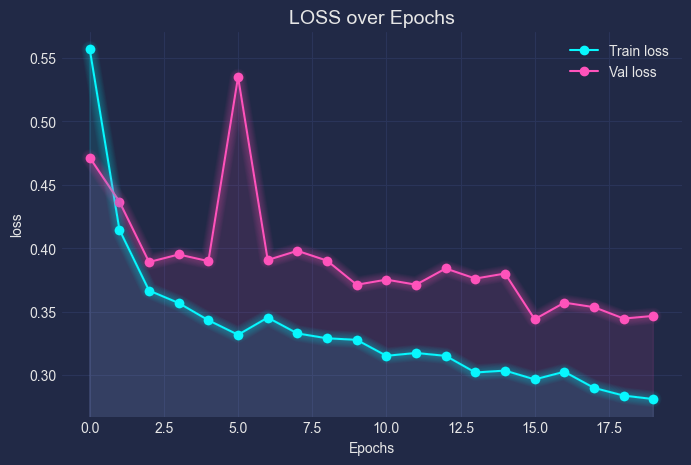

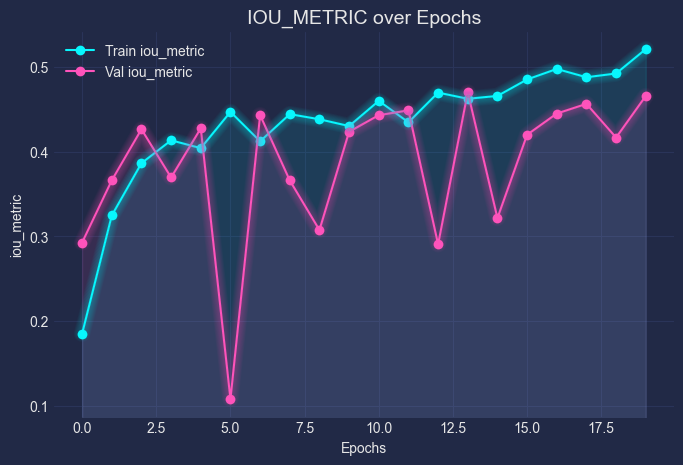

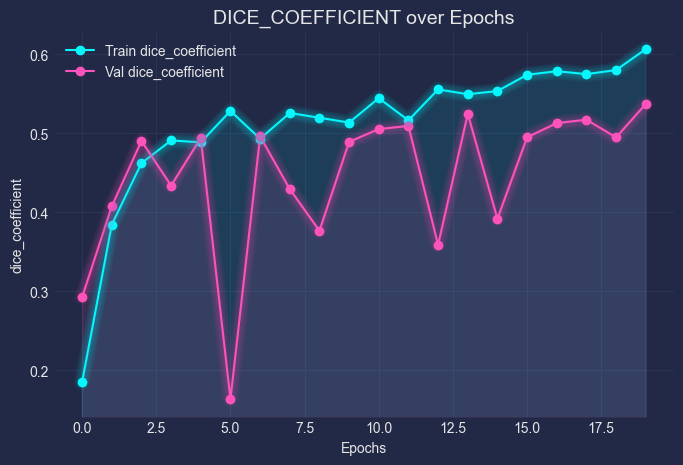

In [40]:
import matplotlib.pyplot as plt
import mplcyberpunk

def plot_from_csv(csv_path):
    history_df = pd.read_csv(csv_path)
    plt.style.use("cyberpunk")

    for metric in ["loss", "iou_metric", "dice_coefficient"]:
        plt.figure(figsize=(8,5))
        plt.plot(history_df[metric], label=f"Train {metric}", marker="o")
        plt.plot(history_df[f"val_{metric}"], label=f"Val {metric}", marker="o")
        plt.title(f"{metric.upper()} over Epochs", fontsize=14)
        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.legend()
        mplcyberpunk.add_glow_effects()
        plt.show()

# Example usage
plot_from_csv(csv_path)


In [41]:
model.save_weights("seg_mri_unet_model.h5")